In [19]:
import scipy
import numpy as np
from matplotlib import pyplot as plt

In [44]:
train_files = [
    "001043-5-0025",
    "002188-2-0037",
    "005405-6-0099",
    "001992-1-0087",
    "003184-2-0169",
    "004510-4-0030",
    "008115-2-0181",
    "002029-6-0222",
    "001035-6-0017",
]
val_files = ["003918-3-0213", "007264-3-0111"]
test_files = ["008162-6-0080"]

common_shape = (1472, 1984, 5)

train_images, train_stars, train_galaxies = [], [], []
for file_name in train_files:
    curr_data = scipy.io.loadmat(f"../data/processed/{file_name}.mat")
    curr_image = curr_data["image"][:common_shape[0], :common_shape[1], :]
    train_images.append(curr_image)
    train_stars.extend(curr_data["stars"])
    train_galaxies.extend(curr_data["galaxies"])
train_images = np.array(train_images)
    
val_images, val_stars, val_galaxies = [], [], []
for file_name in val_files:
    curr_data = scipy.io.loadmat(f"../data/processed/{file_name}.mat")
    curr_image = curr_data["image"][:common_shape[0], :common_shape[1], :]
    val_images.append(curr_image)
    val_stars.extend(curr_data["stars"])
    val_galaxies.extend(curr_data["galaxies"])
val_images = np.array(val_images)

test_images, test_stars, test_galaxies = [], [], []
for file_name in test_files:
    curr_data = scipy.io.loadmat(f"../data/processed/{file_name}.mat")
    curr_image = curr_data["image"][:common_shape[0], :common_shape[1], :]
    test_images.append(curr_image)
    test_stars.extend(curr_data["stars"])
    test_galaxies.extend(curr_data["galaxies"])
test_images = np.array(test_images)

all_stars = train_stars + val_stars + test_stars
all_gals = train_galaxies + val_galaxies + test_galaxies
all_images = np.concatenate((train_images, val_images, test_images), axis=0)

In [43]:
print(f"""
    #Stars full dataset: {len(all_stars)}
    #Galaxies full dataset: {len(all_gals)}
    #Stars train dataset: {len(train_stars)}
    #Galaxies train dataset: {len(train_galaxies)}
    #Stars val dataset: {len(val_stars)}
    #Galaxies val dataset: {len(val_galaxies)}
    #Stars test dataset: {len(test_stars)}
    #Galaxies test dataset: {len(test_galaxies)}
""")


    #Stars full dataset: 4419
    #Galaxies full dataset: 3377
    #Stars train dataset: 2994
    #Galaxies train dataset: 2371
    #Stars val dataset: 518
    #Galaxies val dataset: 701
    #Stars test dataset: 907
    #Galaxies test dataset: 305



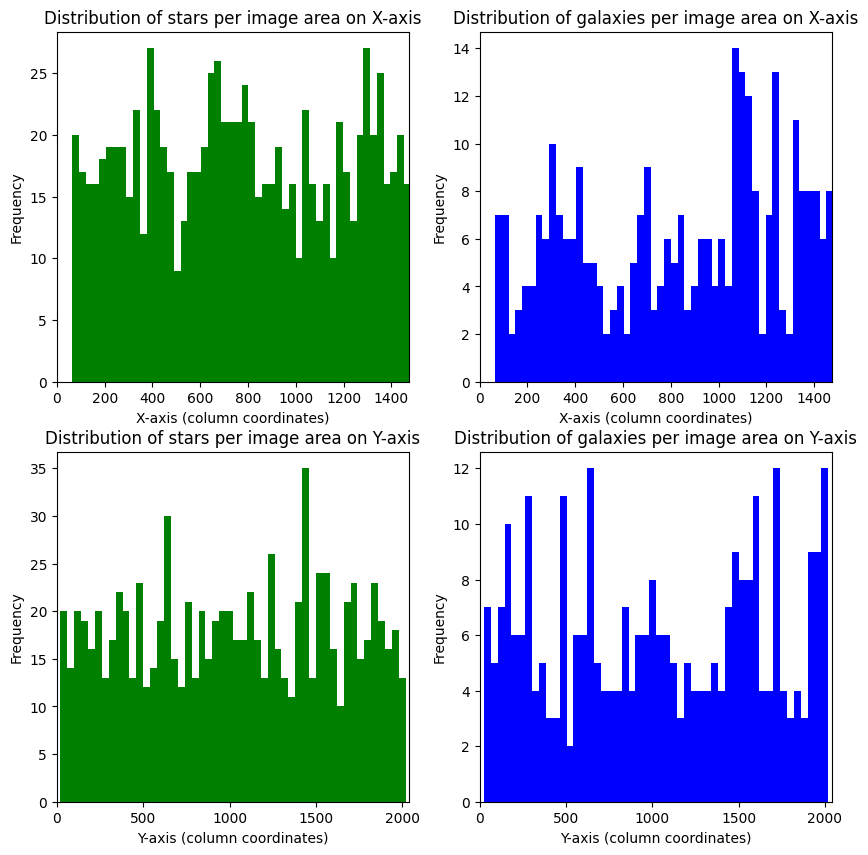

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

stars = np.array(test_stars)
galaxies = np.array(test_galaxies)

ax[0, 0].hist(
    stars[:, 1], bins=50, color="green"
)  # Adjust the number of bins as needed
ax[0, 0].set_xlabel("X-axis (column coordinates)")
ax[0, 0].set_ylabel("Frequency")
ax[0, 0].title.set_text("Distribution of stars per image area on X-axis")
ax[0, 0].set_xlim(0, 1474)

ax[0, 1].hist(
    galaxies[:, 1], bins=50, color="blue"
)  # Adjust the number of bins as needed
ax[0, 1].set_xlabel("X-axis (column coordinates)")
ax[0, 1].set_ylabel("Frequency")
ax[0, 1].title.set_text("Distribution of galaxies per image area on X-axis")
ax[0, 1].set_xlim(0, 1474)

ax[1, 0].hist(
    stars[:, 0], bins=50, color="green"
)  # Adjust the number of bins as needed
ax[1, 0].set_xlabel("Y-axis (column coordinates)")
ax[1, 0].set_ylabel("Frequency")
ax[1, 0].title.set_text("Distribution of stars per image area on Y-axis")
ax[1, 0].set_xlim(0, 2041)

ax[1, 1].hist(
    galaxies[:, 0], bins=50, color="blue"
)  # Adjust the number of bins as needed
ax[1, 1].set_xlabel("Y-axis (column coordinates)")
ax[1, 1].set_ylabel("Frequency")
ax[1, 1].title.set_text("Distribution of galaxies per image area on Y-axis")
ax[1, 1].set_xlim(0, 2041)


plt.show()

In [47]:
channel_mean = np.mean(all_images, axis=(0, 1, 2))
channel_std = np.std(all_images, axis=(0, 1, 2))
print(channel_mean, channel_std)

[0.07550782 0.03695092 0.02047361 0.01012116 0.18500725] [1.21964359 1.00089549 0.6245161  0.8489028  4.37643152]
